In [13]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
e = np.exp(1)
np.random.seed(4)

In [15]:
def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))

In [17]:
y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

In [18]:
density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

In [19]:
density *= pdf_z

In [20]:
a = x + y
b = 2 * y
c = a - b + z

In [21]:
norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

In [22]:
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

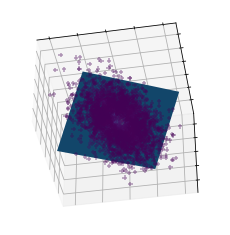

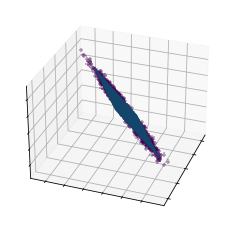

In [23]:
elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

In [32]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

In [25]:
iris = datasets.load_iris()

In [26]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [27]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [28]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.92461872 0.05306648]


In [29]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'PCA of IRIS dataset')

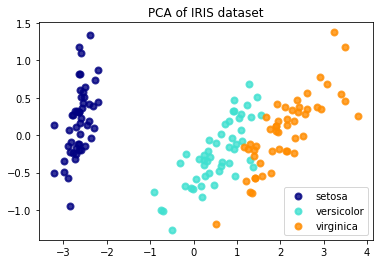

In [30]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

In [31]:
plt.show()